In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import nltk
import utils

In [2]:
%matplotlib inline

In [50]:
stemmed_keywords = utils.get_stemmed_keywords()
interested_columns = list(stemmed_keywords) + ['year', 'president', 'political_party']

In [103]:
df = pd.read_json(utils.suas_with_topic_frequencies)[interested_columns]

In [107]:
 df[df['year'] == 1981]

,social,energy,healthcare,environment,education,defense,government,infrastructure,economy,international,year,president,political_party
11,83,35,14,34,20,65,102,43,111,95,1981,Jimmy Carter,Democrat


In [52]:
# drop jimmy carter written sua
df = df[df['year'] != 1981]

In [79]:
sum_df = df.groupby(by='president').agg({topic: 'sum' for topic in stemmed_keywords.keys()})

In [80]:
sum_df['topics_sum'] = sum_df.sum(axis=1)

In [97]:
sum_df

,social,energy,healthcare,environment,education,defense,government,infrastructure,economy,international,topics_sum
president,,,,,,,,,,,
Barack Obama,266,118,65,56,118,212,378,121,379,229,1942
George H.W. Bush,79,18,13,20,27,62,118,25,95,72,529
George W. Bush,273,88,71,58,81,224,369,58,286,224,1732
Gerald R. Ford,72,31,12,18,8,70,124,21,119,88,563
Jimmy Carter,69,23,6,15,9,71,94,17,102,77,483
Richard Nixon,98,25,19,34,24,71,178,32,157,94,732
Ronald Reagan,197,36,29,30,69,148,298,59,273,191,1330
William J. Clinton,296,70,70,84,102,191,341,79,326,219,1778


In [84]:
frac_df = sum_df[[topic for topic in stemmed_keywords.keys()]].div(sum_df['topics_sum'], axis=0).reset_index()

In [85]:
frac_df

,president,social,energy,healthcare,environment,education,defense,government,infrastructure,economy,international
0,Barack Obama,0.136972,0.060762,0.033471,0.028836,0.060762,0.109166,0.194645,0.062307,0.195160,0.117920
1,George H.W. Bush,0.149338,0.034026,0.024575,0.037807,0.051040,0.117202,0.223062,0.047259,0.179584,0.136106
2,George W. Bush,0.157621,0.050808,0.040993,0.033487,0.046767,0.129330,0.213048,0.033487,0.165127,0.129330
3,Gerald R. Ford,0.127886,0.055062,0.021314,0.031972,0.014210,0.124334,0.220249,0.037300,0.211368,0.156306
4,Jimmy Carter,0.142857,0.047619,0.012422,0.031056,0.018634,0.146998,0.194617,0.035197,0.211180,0.159420
5,Richard Nixon,0.133880,0.034153,0.025956,0.046448,0.032787,0.096995,0.243169,0.043716,0.214481,0.128415
6,Ronald Reagan,0.148120,0.027068,0.021805,0.022556,0.051880,0.111278,0.224060,0.044361,0.205263,0.143609
7,William J. Clinton,0.166479,0.039370,0.039370,0.047244,0.057368,0.107424,0.191789,0.044432,0.183352,0.123172


In [54]:
# std_df = df.groupby(by='president') \
#     .agg({topic: 'std' for topic in stemmed_keywords.keys()}) \
#     .rename(columns={topic: topic + '_std' for topic in stemmed_keywords.keys()}).reset_index()

In [55]:
# zscore_df = pd.merge(df, mean_df, left_on='president', right_on='president')
# zscore_df = pd.merge(zscore_df, std_df, left_on='president', right_on='president')

In [56]:
# for col in stemmed_keywords.keys():
#     col_zscore = col + '_zscore'
#     col_mean = col + '_mean'
#     col_std = col + '_std'
#     zscore_df[col_zscore] = (zscore_df[col] - zscore_df[col_mean]) / zscore_df[col_std]

In [75]:
# zscore_df[['president'] + [col+'_zscore' for col in stemmed_keywords.keys()]]

In [10]:
presidents_ordered = ['Richard Nixon', 'Gerald R. Ford', 'Jimmy Carter', 'Ronald Reagan', 'George H.W. Bush',
                      'William J. Clinton', 'George W. Bush', 'Barack Obama']

In [28]:
def plot_color(political_party):
    if political_party == 'Republican':
        return 'r'
    else:
        return 'b'

In [92]:
# fig, ax = plt.subplots()
# for i, president in enumerate(presidents_ordered):
#     for j, topic in enumerate(stemmed_keywords.keys()):
#         president_row = zscore_df[zscore_df['president'] == president]
#         topic_zscore = president_row[topic+'_zscore']
#         party = president_row['political_party'].mode()
#         #print (president_row)
#         #print (topic_zscore)
#         #print (party)
#         ax.scatter(i, j, s=topic_zscore*200, color=plot_color(party), alpha=0.75)
# ax.set_xticklabels([''] + [p.split(' ')[-1] for p in presidents_ordered], rotation=45)
# ax.set_yticklabels(list(stemmed_keywords.keys()))
# ax.set_yticks(list(range(0, len(list(stemmed_keywords.keys())))))


'Democrat'

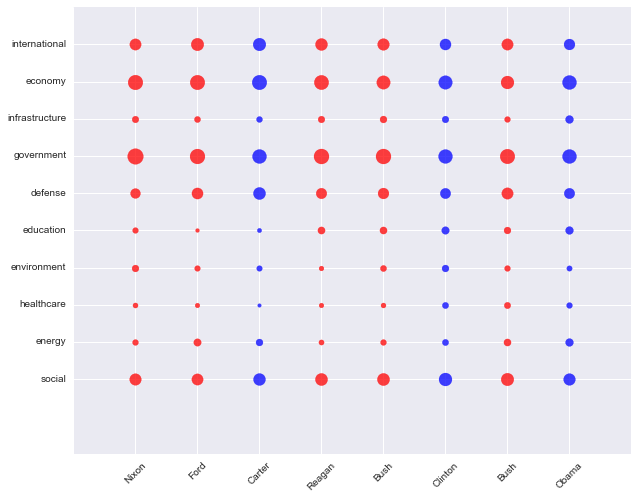

In [102]:
fig, ax = plt.subplots()
for i, president in enumerate(presidents_ordered):
    for j, topic in enumerate(stemmed_keywords.keys()):
        frac = frac_df[frac_df['president'] == president][topic]
        party = df[df['president'] == president]['political_party'].iloc[0]
        ax.scatter(i, j, s=frac*1000, color=plot_color(party), alpha=0.75)
ax.set_xticklabels([''] + [p.split(' ')[-1] for p in presidents_ordered], rotation=45)
ax.set_yticklabels(list(stemmed_keywords.keys()))
ax.set_yticks(list(range(0, len(list(stemmed_keywords.keys())))))
fig.set_size_inches(10, 8)